### NOMS:
### PROMOTION:
## ANALYSE EXPLORATOIRE AVEC PYTHON

In [1]:
#Importation des libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Chargement des données
catdata=pd.read_csv('catdata.csv')
#on affiche les premieres lignes
catdata.head(8)

,"haircolor;""hairpattern"";""sex"";""weight"";""age"";""foodtype"""
0,"red;""tortoise"";""female"";3.7;7;""dry"""
1,"black;""tipped"";""male"";6;4;""wet"""
2,"black;""tabby"";""male"";5.4;4;""dry"""
3,"white;""solid"";""male"";5;4;""dry"""
4,"brown;""tipped"";""female"";3.3;6;""dry"""
5,"white;""colorpoint"";""male"";5.1;4;""dry"""
6,"black;""tortoise"";""male"";5.9;8;""wet"""
7,"red;""tortoise"";""female"";4.7;3;""dry"""


In [3]:
#Chargement des données en precisant le separateur
catdata=pd.read_csv('catdata.csv',sep=';')
#on affiche les premieres lignes
catdata.head()

,haircolor,hairpattern,sex,weight,age,foodtype
0,red,tortoise,female,3.7,7,dry
1,black,tipped,male,6.0,4,wet
2,black,tabby,male,5.4,4,dry
3,white,solid,male,5.0,4,dry
4,brown,tipped,female,3.3,6,dry


In [4]:
#on affiche les 5 dernieres lignes
catdata.tail()

,haircolor,hairpattern,sex,weight,age,foodtype
148,red,tortoise,male,3.7,10,dry
149,white,solid,female,4.5,5,dry
150,black,tabby,female,6.0,4,wet
151,white,tabby,female,5.3,8,dry
152,black,tabby,female,5.8,10,dry


In [5]:
#on affiche les informations sur le dataset
catdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   haircolor    153 non-null    object 
 1   hairpattern  153 non-null    object 
 2   sex          153 non-null    object 
 3   weight       153 non-null    float64
 4   age          153 non-null    int64  
 5   foodtype     153 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.3+ KB


In [6]:
#on affiche une descriptive des variables numeriques
catdata.describe()

,weight,age
count,153.000000,153.000000
mean,4.805882,6.333333
std,0.960827,2.752989
min,2.700000,2.000000
25%,4.100000,4.000000
50%,4.900000,6.000000
75%,5.600000,8.000000
max,6.800000,14.000000


In [7]:
#On veut afficher seulement la colonne sex
catdata['sex'] #ou catdata.sex

0      female
1        male
2        male
3        male
4      female
        ...  
148      male
149    female
150    female
151    female
152    female
Name: sex, Length: 153, dtype: object

In [8]:
#Pour deux colonnes
column=['sex','age']
catdata[column]

,sex,age
0,female,7
1,male,4
2,male,4
3,male,4
4,female,6
...,...,...
148,male,10
149,female,5
150,female,4
151,female,8


In [9]:
#Repartition par sex
catdata['sex'].value_counts()

male      85
female    68
Name: sex, dtype: int64

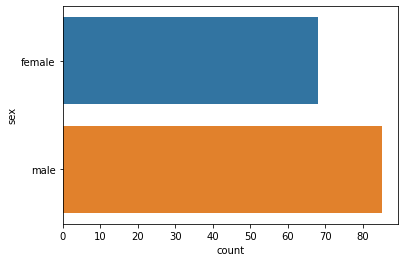

In [10]:
#Repartition sur un graphique
sb.countplot(y=catdata['sex']);

In [11]:
#repartition pour haircolor
catdata.haircolor.value_counts()

black    68
red      35
white    33
brown    17
Name: haircolor, dtype: int64

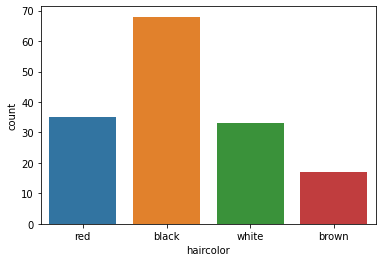

In [12]:
#Repartition sur un graphique
sb.countplot(x=catdata.haircolor);

### QUELQUES REQUETES

In [18]:
#Croisement haircolor avec sex
pd.crosstab(catdata.sex,catdata.haircolor,margins=True)

haircolor,black,brown,red,white,All
sex,,,,,
female,29,7,15,17,68
male,39,10,20,16,85
All,68,17,35,33,153


In [20]:
#Croisement haircolor avec sex AVEC POURCENTAGE
pd.crosstab(catdata.sex,catdata.haircolor,margins=True,normalize=True)*100

haircolor,black,brown,red,white,All
sex,,,,,
female,18.954248,4.575163,9.803922,11.111111,44.444444
male,25.490196,6.535948,13.071895,10.457516,55.555556
All,44.444444,11.111111,22.875817,21.568627,100.000000


## Commentaire:
En observant ce tableau, on constate que les chats de sex feminin sont moins
représentés avec une proportion de 44,44%. Ceux de sex masculin sont majoritaires
et représentent 55,56% du total.
Details:........

In [22]:
#Croisement haircolor avec sex AVEC POURCENTAGE(lecture en colonne)
pd.crosstab(catdata.sex,catdata.haircolor,margins=True,normalize='columns')*100

haircolor,black,brown,red,white,All
sex,,,,,
female,42.647059,41.176471,42.857143,51.515152,44.444444
male,57.352941,58.823529,57.142857,48.484848,55.555556


## Commentaire(lecture en colonne):.......

In [23]:
#Croisement haircolor avec sex AVEC POURCENTAGE(lecture en ligne)
pd.crosstab(catdata.sex,catdata.haircolor,margins=True,normalize='index')*100

haircolor,black,brown,red,white
sex,,,,
female,42.647059,10.294118,22.058824,25.000000
male,45.882353,11.764706,23.529412,18.823529
All,44.444444,11.111111,22.875817,21.568627


## Commentaire(lecture en ligne):
...............

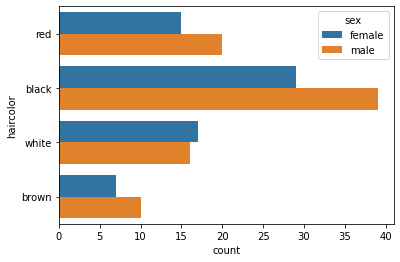

In [25]:
#Représentation de deux variables sur un seul graphique
sb.countplot(data=catdata,y='haircolor',hue='sex');

In [26]:
#correlation entre les donnees numeriques
var_num=['age','weight']
catdata[var_num].corr()

,age,weight
age,1.000000,-0.201213
weight,-0.201213,1.000000


## Commentaire:
En observant ce tableau, on remarque que le poid ne depend pas de l'age. il n'existe pas de correlation entre le poid et l'age.

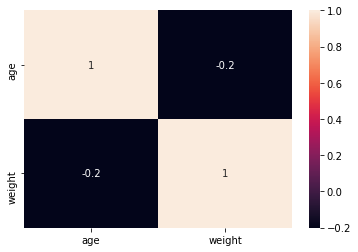

In [28]:
#Visualisation sur un graphique
sb.heatmap(catdata[var_num].corr(),annot=True);

In [29]:
#On peut acceder aux 7 premieres lignes de toutes les colonnes
catdata.iloc[0:7,:]

,haircolor,hairpattern,sex,weight,age,foodtype
0,red,tortoise,female,3.7,7,dry
1,black,tipped,male,6.0,4,wet
2,black,tabby,male,5.4,4,dry
3,white,solid,male,5.0,4,dry
4,brown,tipped,female,3.3,6,dry
5,white,colorpoint,male,5.1,4,dry
6,black,tortoise,male,5.9,8,wet
